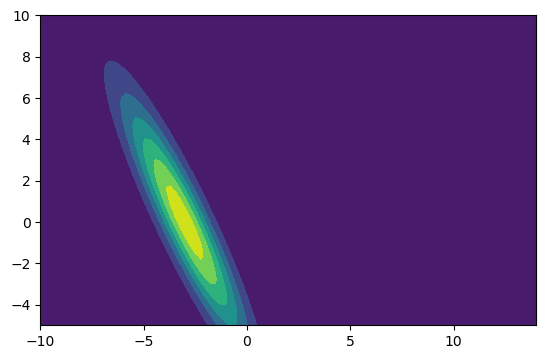

In [38]:
using PyPlot

function biv(x, y)
    m1, m2 = 0.0, -3.0
    s1, s2 = 4, 2
    cor = -0.92
    exp(-((x-m1)^2/s1^2+(y-m2)^2/s2^2-2*cor*(x-m1)*(y-m2)/s1/s2)/2/(1-cor^2))/2/π/s1/s2/sqrt(1-cor^2)
end

x = range(-5, length=100, stop=10) |> collect
y = range(-10, length=100, stop=14) |> collect

# To get covariance we need:
# 1. p(x) and p(y) alone, so margenalize (or profile) first, to get mean and sigma

z = [biv(i,j) for i in x, j in y]
z = z / maximum(z)

sx, sy = 4, 2
mx = x ./ sy
my = y ./ sx

plt.contourf(y, x, z)
plt.xlim()
plt.axis("scaled")
plt.show()

In [39]:
## A = y, B = x
mx = sum(z, dims=2)
my = transpose( sum(z, dims=1) )

mx = mx / sum(mx)
my = my / sum(my)

function meanV(x, mx)
    sum(x.*mx)
end

function variance(x, mx, mn)
    sum((x .- mn).^2 .*mx)
end

function covariance(x, y, mx, my, z)
    @show N = sum(z)
    sum((x .- mx).*transpose(y .- my).*z)/N
end

@show meanx = meanV(x, mx)
@show varx = sqrt( variance(x, mx, meanx) )
@show meany = meanV(y, my)
@show vary = sqrt( variance(y, my, meany) )
@show size(z)
@show cov = covariance(x, y, meanx, meany, z)
@show cor = cov/varx/vary

#plt.plot(x, mx)
#plt.plot(y, my)
#plt.show()

meanx = meanV(x, mx) = 0.7248524150763684
varx = sqrt(variance(x, mx, meanx)) = 3.264835206362114
meany = meanV(y, my) = -3.333425924324816
vary = sqrt(variance(y, my, meany)) = 1.6940510223732657
size(z) = (100, 100)
N = sum(z) = 478.71032418921527
cov = covariance(x, y, meanx, meany, z) = -4.903154336626539
cor = (cov / varx) / vary = -0.8865185189371521


-0.8865185189371521